In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, KFold

# Carregando as variáveis train e validation do dataset UNSW Train50

In [2]:
import pickle

In [3]:
with open('df_unsw_train50_no_preprocessing_labelencoder', mode = 'rb') as f:
    X_train50_train, X_train50_test, y_train50_multiclass_train, y_train50_multiclass_test, y_train50_binary_train, y_train50_binary_test = pickle.load(f)

In [4]:
print('X treino = ', X_train50_train.shape)
print('X teste = ', X_train50_test.shape)
print('y multiclasse treino = ', y_train50_multiclass_train.shape)
print('y multiclasse teste = ', y_train50_multiclass_test.shape)
print('y binário treino = ', y_train50_binary_train.shape)
print('y binário teste = ', y_train50_binary_test.shape)

X treino =  (889011, 47)
X teste =  (381005, 47)
y multiclasse treino =  (889011,)
y multiclasse teste =  (381005,)
y binário treino =  (889011,)
y binário teste =  (381005,)


In [5]:
y_train50_binary_train.value_counts()

0    776437
1    112574
Name: Label_binary, dtype: int64

In [6]:
y_train50_multiclass_train.value_counts()

Benign            776437
Generic            75438
Exploits           15636
Fuzzers             8501
DoS                 5679
Reconnaissance      4965
Analysis             928
Backdoor             822
Shellcode            544
Worms                 61
Name: Label_multiclass, dtype: int64

In [7]:
y_train50_binary_test.value_counts()

0    332943
1     48062
Name: Label_binary, dtype: int64

In [8]:
y_train50_multiclass_test.value_counts()

Benign            332943
Generic            32302
Exploits            6626
Fuzzers             3621
DoS                 2497
Reconnaissance      2028
Analysis             410
Backdoor             342
Shellcode            211
Worms                 25
Name: Label_multiclass, dtype: int64

In [9]:
X_train50_train.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src__ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
1126124,38,63740,23,62606,114,5,1.004882,1580,10168,31,...,6.0,0.0,0,15,8,10,22,6,6,6
1202977,40,20344,22,50874,114,5,0.357506,2542,23508,31,...,7.0,3.0,7,6,7,6,5,1,1,2
39741,41,3394,20,61478,114,5,28.539139,36970,1641360,31,...,0.0,0.0,0,9,6,4,4,3,1,3
156053,38,53118,26,25911,114,5,0.512517,8928,320,31,...,0.0,0.0,0,9,3,3,8,2,1,2
1230603,37,58507,27,16512,114,5,0.045381,37500,3380,31,...,0.0,0.0,0,1,1,1,4,1,1,1


In [10]:
print(y_train50_multiclass_train.unique())
print(y_train50_binary_train.unique())

['Benign' 'DoS' 'Generic' 'Fuzzers' 'Analysis' 'Exploits' 'Reconnaissance'
 'Shellcode' 'Backdoor' 'Worms']
[0 1]


In [11]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [12]:
X_train50_train = X_train50_train.to_numpy()
y_train50_multiclass_train = y_train50_multiclass_train.to_numpy()
y_train50_binary_train = y_train50_binary_train.to_numpy()
X_train50_test = X_train50_test.to_numpy()
y_train50_multiclass_test = y_train50_multiclass_test.to_numpy()
y_train50_binary_test = y_train50_binary_test.to_numpy()

In [13]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Carregando as variáveis do dataset UNSW Test50

In [57]:
with open('df_unsw_test50_no_preprocessing_labelencoder', mode = 'rb') as f:
    X_test50, y_test50_multiclass, y_test50_binary = pickle.load(f)

In [58]:
print('X = ', X_test50.shape)
print('y multiclasse = ', y_test50_multiclass.shape)
print('y binário = ', y_test50_binary.shape)

X =  (1270018, 47)
y multiclasse =  (1270018,)
y binário =  (1270018,)


In [59]:
y_test50_multiclass.value_counts()

Benign            1109380
Generic            107740
Exploits            22262
Fuzzers             12123
DoS                  8176
Reconnaissance       6993
Analysis             1338
Backdoor             1164
Shellcode             755
Worms                  87
Name: Label_multiclass, dtype: int64

In [60]:
y_test50_binary.value_counts()

0    1109380
1     160638
Name: Label_binary, dtype: int64

In [61]:
X_test50.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src__ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
0,35,42325,21,39962,114,5,0.039096,2974,31328,31,...,7.0,3.0,7,8,8,6,3,1,1,10
1,35,15576,22,63617,114,5,0.009790,424,8824,31,...,7.0,3.0,7,3,3,5,6,1,1,4
2,33,14173,27,12006,114,5,0.008764,2230,14740,31,...,7.0,3.0,7,2,3,1,3,1,1,1
3,38,33848,25,62606,114,5,1.036823,1580,10168,31,...,1.0,3.0,7,1,1,3,3,1,1,2
4,42,12229,21,12108,114,5,0.872706,2934,3740,31,...,7.0,1.0,1,1,1,2,3,1,1,4


In [62]:
print(y_test50_multiclass.unique())
print(y_test50_binary.unique())

['Benign' 'DoS' 'Fuzzers' 'Generic' 'Exploits' 'Shellcode'
 'Reconnaissance' 'Analysis' 'Backdoor' 'Worms']
[0 1]


In [20]:
#X_test50.shape

In [21]:
# verifica detalhes das variáveis
# variáveis nominais: #proto #state #service #ct_ftp_cmd
#df_unsw_full.shape
#df_unsw_full.describe()
#df_unsw_full.dtypes
#y_test50_multiclass.value_counts()
#np.unique(df_unsw_full['sport'])
#len(np.unique(df_unsw_full.ct_ftp_cmd))

In [63]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [64]:
X_test50 = X_test50.to_numpy()
y_test50_multiclass = y_test50_multiclass.to_numpy()
y_test50_binary = y_test50_binary.to_numpy()

In [65]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Algoritmo kNN para Train e Validation - Train50

In [25]:
from sklearn.neighbors import KNeighborsClassifier

### Predição train50 binária

In [26]:
knn_train50_binary = KNeighborsClassifier(n_neighbors=4, p=2)

In [27]:
knn_train50_binary.fit(X_train50_train, y_train50_binary_train)

KNeighborsClassifier(n_neighbors=4)

In [28]:
predict_train50_binary = knn_train50_binary.predict(X_train50_test)

In [29]:
predict_train50_binary

array([1, 0, 0, ..., 0, 0, 0])

In [30]:
y_train50_binary_test

array([1, 0, 0, ..., 0, 0, 0])

In [31]:
accuracy_score(y_train50_binary_test, predict_train50_binary)

0.9775750974396662

### Visualização da árvore binária

In [32]:
#from sklearn import tree
#from dtreeviz.trees import dtreeviz
#from matplotlib import pyplot as plt
#plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
#plt.rcParams.update({'font.size': 14})

In [33]:
#plt.figure(figsize=(20,10))
#grafic = tree.plot_tree(xgb_train50_binary.estimators_[0], feature_names=X_train50_train.columns, filled=True)

In [34]:
#viz = dtreeviz(xgb_train50_binary.estimators_[0], X_train50_train, y_train50_binary_train, feature_names=X_train50_train.columns, target_name='Label_binary')
#viz

In [35]:
#fig, ax = plt.subplots(figsize=(20,30))
#lgb.plot_importance(lgb_train50_binary, ax=ax)

### Predição train50 multiclasse

In [36]:
knn_train50_multiclass =  KNeighborsClassifier(n_neighbors=4, p=2)

In [37]:
knn_train50_multiclass.fit(X_train50_train, y_train50_multiclass_train)

KNeighborsClassifier(n_neighbors=4)

In [38]:
predict_train50_multiclass = knn_train50_multiclass.predict(X_train50_test)

In [39]:
predict_train50_multiclass

array(['Generic', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [40]:
y_train50_multiclass_test

array(['Generic', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [41]:
accuracy_score(y_train50_multiclass_test, predict_train50_multiclass)

0.9626487841366911

### Visualização da árvore multiclasse

In [42]:
#plt.figure(figsize=(20,10))
#grafic = tree.plot_tree(xgb_train50_multiclass.estimators_[0], feature_names=X_train50_train.columns, filled=True)

In [43]:
#viz = dtreeviz(xgb_train50_multiclass.estimators_[0], X_train50_train, y_train50_multiclass_train, feature_names=X_train50_train.columns, target_name='Label_multiclass')
#viz

In [44]:
#fig, ax = plt.subplots(figsize=(20,30))
#lgb.plot_importance(lgb_train50_binary, ax=ax)

In [45]:
#lgb.plot_tree(lgb_train50_binary, figsize=(20,6), tree_index=0, dpi=100)

### Precision e Recall do train50

In [46]:
print(classification_report(y_train50_binary_test, predict_train50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   0.981203  0.993368  0.987248    332943
           1   0.949743  0.868170  0.907126     48062

    accuracy                       0.977575    381005
   macro avg   0.965473  0.930769  0.947187    381005
weighted avg   0.977234  0.977575  0.977141    381005



In [47]:
print(classification_report(y_train50_multiclass_test, predict_train50_multiclass, digits=6, zero_division=1))

                precision    recall  f1-score   support

      Analysis   0.063670  0.082927  0.072034       410
      Backdoor   0.074468  0.081871  0.077994       342
        Benign   0.979648  0.994654  0.987094    332943
           DoS   0.338957  0.354025  0.346327      2497
      Exploits   0.360797  0.278901  0.314607      6626
       Fuzzers   0.395285  0.199116  0.264830      3621
       Generic   0.995369  0.971457  0.983268     32302
Reconnaissance   0.755651  0.346154  0.474806      2028
     Shellcode   0.325581  0.066351  0.110236       211
         Worms   1.000000  0.000000  0.000000        25

      accuracy                       0.962649    381005
     macro avg   0.528943  0.337546  0.363120    381005
  weighted avg   0.957114  0.962649  0.958933    381005



### Cross Validation do train50

In [48]:
# cross validation binary
cv_result_train50_binary = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_binary = cross_val_score(knn_train50_binary, X_train50_train, y_train50_binary_train, cv=kfold)
cv_result_train50_binary.append(score_cv_train50_binary.mean())

In [49]:
score_cv_train50_binary

array([0.97678342, 0.97796425, 0.97788551, 0.97771679, 0.97663693,
       0.97754806, 0.97716561, 0.97681691, 0.97791926, 0.97669318])

In [50]:
cv_result_train50_binary

[0.9773129922234569]

In [51]:
# cross validation multiclass
cv_result_train50_multiclass = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_multiclass = cross_val_score(knn_train50_multiclass, X_train50_train, y_train50_multiclass_train, cv=kfold)
cv_result_train50_multiclass.append(score_cv_train50_multiclass.mean())

In [52]:
score_cv_train50_multiclass

array([0.96246429, 0.96250886, 0.96249761, 0.96344248, 0.96174396,
       0.96292505, 0.96277882, 0.96207017, 0.96237388, 0.96058537])

In [53]:
cv_result_train50_multiclass

[0.9623390485323151]

### Matriz de Confusão do train50

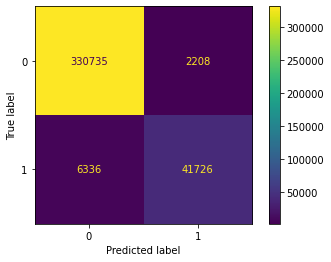

In [54]:
ConfusionMatrixDisplay.from_estimator(knn_train50_binary, X_train50_test, y_train50_binary_test)
plt.show()

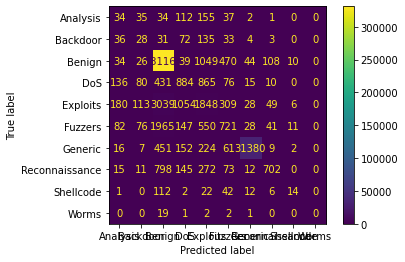

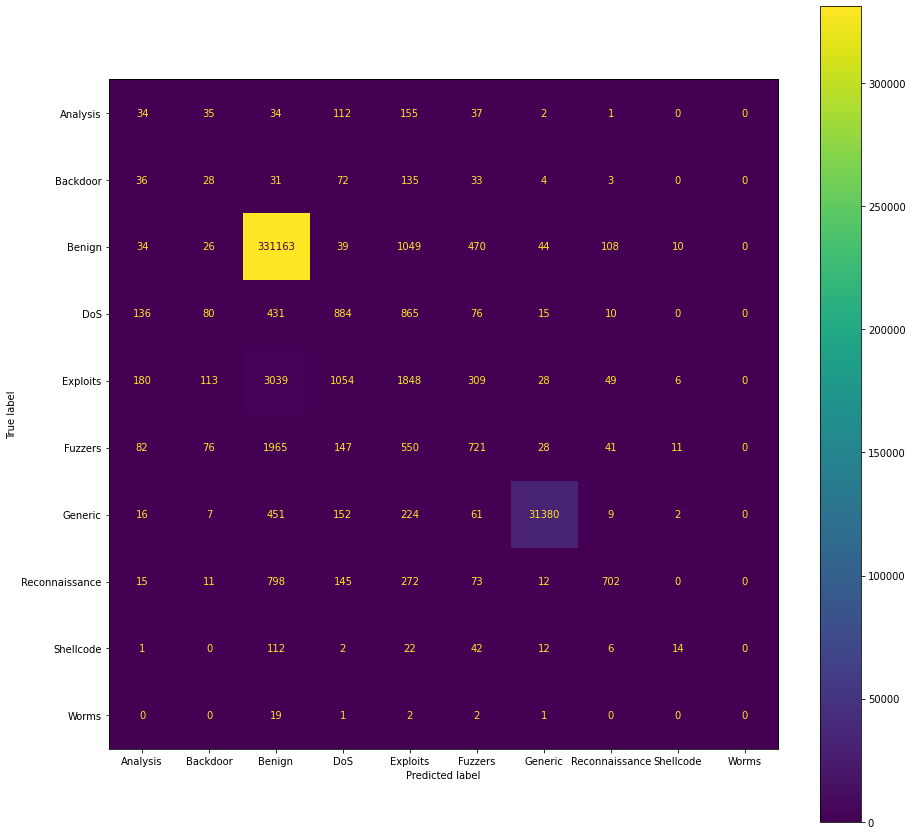

In [55]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_train50_test, y_train50_multiclass_test)
#plt.show()

cm_knn_multiclass_train = ConfusionMatrixDisplay.from_estimator(knn_train50_multiclass, X_train50_test, y_train50_multiclass_test)
fig, ax = plt.subplots(figsize=(15,15))
cm_knn_multiclass_train.plot(ax=ax)

# Algoritmo kNN para Test50

### Predição Test50 binária

In [66]:
predict_test50_binary = knn_train50_binary.predict(X_test50)

In [67]:
predict_test50_binary

array([0, 0, 0, ..., 0, 0, 1])

In [68]:
y_test50_binary

array([0, 0, 0, ..., 0, 0, 0])

In [69]:
accuracy_score(y_test50_binary, predict_test50_binary)

0.7994713460754099

### Predição test50 multiclasse

In [70]:
predict_test50_multiclass = knn_train50_multiclass.predict(X_test50)

In [71]:
predict_test50_multiclass

array(['Benign', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Fuzzers'],
      dtype=object)

In [72]:
y_test50_multiclass

array(['Benign', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [73]:
accuracy_score(y_test50_multiclass, predict_test50_multiclass)

0.8056255895585732

### Precision e Recall do test50

In [74]:
print(classification_report(y_test50_binary, predict_test50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   0.977292  0.788762  0.872964   1109380
           1   0.374500  0.873430  0.524227    160638

    accuracy                       0.799471   1270018
   macro avg   0.675896  0.831096  0.698596   1270018
weighted avg   0.901048  0.799471  0.828854   1270018



In [75]:
print(classification_report(y_test50_multiclass, predict_test50_multiclass, digits=6, zero_division=1))

                precision    recall  f1-score   support

      Analysis   0.010025  0.002990  0.004606      1338
      Backdoor   0.001709  0.000859  0.001144      1164
        Benign   0.975846  0.815352  0.888409   1109380
           DoS   0.239538  0.623777  0.346150      8176
      Exploits   0.050269  0.142036  0.074257     22262
       Fuzzers   0.041222  0.226182  0.069735     12123
       Generic   0.933639  0.976508  0.954593    107740
Reconnaissance   0.455756  0.332904  0.384762      6993
     Shellcode   0.001060  0.103311  0.002099       755
         Worms   0.000000  0.000000  0.000000        87

      accuracy                       0.805626   1270018
     macro avg   0.270906  0.322392  0.272575   1270018
  weighted avg   0.936959  0.805626  0.863341   1270018



### Matriz de Confusão do test50

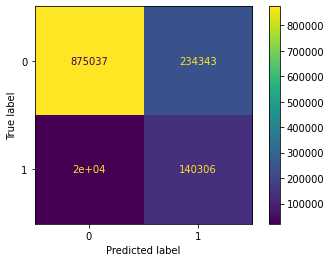

In [76]:
ConfusionMatrixDisplay.from_estimator(knn_train50_binary, X_test50, y_test50_binary)
plt.show()

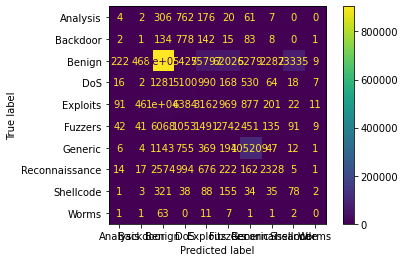

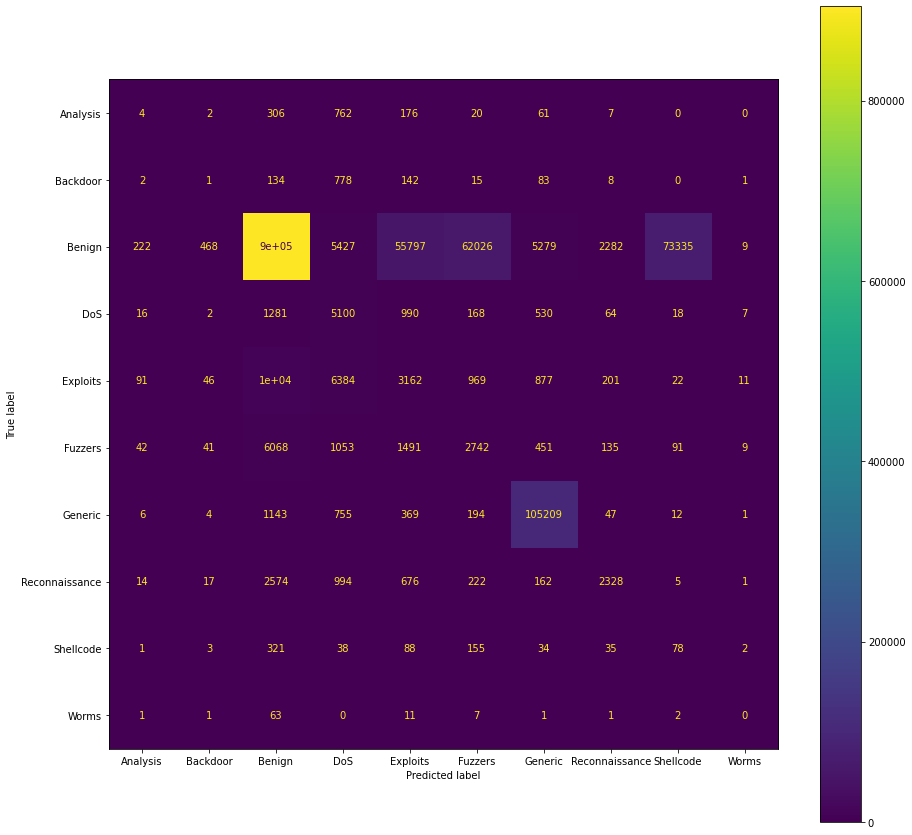

In [77]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_test50, y_test50_multiclass)
#plt.show()

cm_knn_multiclass_train = ConfusionMatrixDisplay.from_estimator(knn_train50_multiclass, X_test50, y_test50_multiclass)
fig, ax = plt.subplots(figsize=(15,15))
cm_knn_multiclass_train.plot(ax=ax)